### National Sample Survey Organisation Socio economic analysis

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
df=pd.read_csv("c:/csv-ml/NSSO68 data set.csv")

In [5]:
#exploring the dimension
df.shape

(101662, 384)

In [6]:
#analysing data types
(df.dtypes).head()

Unnamed: 0       int64
grp             object
Round_Centre     int64
FSU_number       int64
Round            int64
dtype: object

### Data preparation: Missing values analysis

In [7]:
#analysing missing values
df.isna().sum().head(20)

Unnamed: 0                0
grp                       0
Round_Centre              0
FSU_number                0
Round                     0
Schedule_Number           0
Sample                    0
Sector                    0
state                     0
State_Region              0
District                  0
Stratum_Number            0
Sub_Stratum               0
Schedule_type             0
Sub_Round                 0
Sub_Sample                0
FOD_Sub_Region            8
Hamlet_Group_Sub_Block    0
Second                    0
X_Stage_Stratum           0
dtype: int64

In [8]:
isna=df.isna().sum()

In [9]:
#extracting the columns which have missing values
isna_col=isna[isna>0].index

In [10]:
isna_col

Index(['FOD_Sub_Region', 'NIC_2008', 'NCO_2004', 'HH_type', 'Religion',
       'Social_Group', 'Whether_owns_any_land', 'Type_of_land_owned',
       'Land_Owned', 'Land_Leased_in', 'Otherwise_possessed',
       'Land_Leased_out', 'Land_Total_possessed',
       'During_July_June_Cultivated', 'During_July_June_Irrigated', 'land_tt',
       'Cooking_code', 'Lighting_code', 'Dwelling_unit_code',
       'Regular_salary_earner', 'Perform_Ceremony',
       'Meals_seved_to_non_hhld_members', 'Possess_ration_card',
       'Type_of_ration_card', 'Marital_Status', 'Education',
       'Days_Stayed_away', 'No_of_Meals_per_day', 'Meals_School',
       'Meals_Employer', 'Meals_Others', 'Meals_Payment', 'Meals_At_Home',
       'Source_Code', 'soyabean_q', 'soyabean_v'],
      dtype='object')

In [11]:
print("the number of columns which have missing values ",len(isna_col))

the number of columns which have missing values  36


In [12]:
#calulating the %
def cal_perc_null(data):
    li=[]
    labels=[]
    isna=data.isna().sum()
    isna_col=isna[isna>0].index
    for i in isna_col:
        x=(data[i].isna().sum()/data.shape[0])*100
        li.append(x)
        labels.append(i)
    list_na=pd.Series(np.array(li),index=labels)
    return list_na


In [13]:
list_na=cal_perc_null(df)

In [14]:
#the column names along with the % of values missing
list_na

FOD_Sub_Region                       0.007869
NIC_2008                             7.388208
NCO_2004                             7.364600
HH_type                              0.026559
Religion                             0.002951
Social_Group                         0.013771
Whether_owns_any_land                0.009837
Type_of_land_owned                  13.677677
Land_Owned                          14.179339
Land_Leased_in                      82.481163
Otherwise_possessed                 95.790954
Land_Leased_out                     95.217485
Land_Total_possessed                 0.431823
During_July_June_Cultivated         58.706301
During_July_June_Irrigated          75.886762
land_tt                              0.431823
Cooking_code                         0.004918
Lighting_code                        0.007869
Dwelling_unit_code                   0.006886
Regular_salary_earner                0.011804
Perform_Ceremony                     0.062954
Meals_seved_to_non_hhld_members   

In [15]:
#extracting columns which have more than 70% missing values
drop_col=list_na[list_na>.70].index


In [16]:
print("The columns which have more than 70% missing values are:",drop_col)

The columns which have more than 70% missing values are: Index(['NIC_2008', 'NCO_2004', 'Type_of_land_owned', 'Land_Owned',
       'Land_Leased_in', 'Otherwise_possessed', 'Land_Leased_out',
       'During_July_June_Cultivated', 'During_July_June_Irrigated',
       'Meals_seved_to_non_hhld_members', 'Type_of_ration_card',
       'Days_Stayed_away', 'Meals_School', 'Meals_Employer', 'Meals_Others',
       'Meals_Payment', 'Meals_At_Home', 'Source_Code', 'soyabean_q',
       'soyabean_v'],
      dtype='object')


In [17]:
#dropping the columns with excessive missing values
df2=df.drop(drop_col,axis=1)

In [18]:
#checking the % of missing values in the remaining columns
list_na2=cal_perc_null(df2)

In [19]:
print("The remaining columns with the missing values are :\n",list_na2)


The remaining columns with the missing values are :
 FOD_Sub_Region           0.007869
HH_type                  0.026559
Religion                 0.002951
Social_Group             0.013771
Whether_owns_any_land    0.009837
Land_Total_possessed     0.431823
land_tt                  0.431823
Cooking_code             0.004918
Lighting_code            0.007869
Dwelling_unit_code       0.006886
Regular_salary_earner    0.011804
Perform_Ceremony         0.062954
Possess_ration_card      0.012787
Marital_Status           0.001967
Education                0.006886
No_of_Meals_per_day      0.024591
dtype: float64


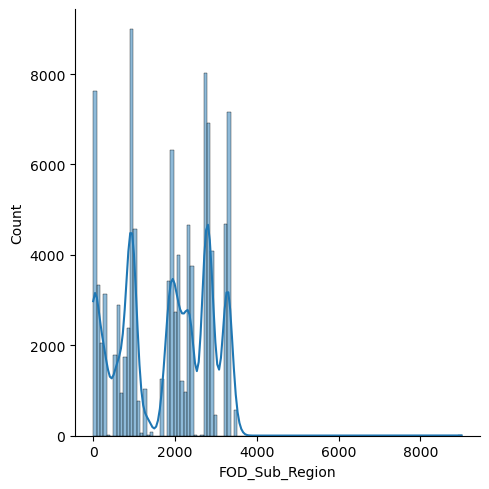

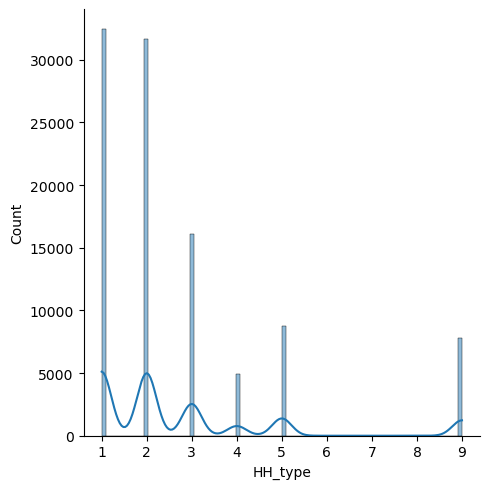

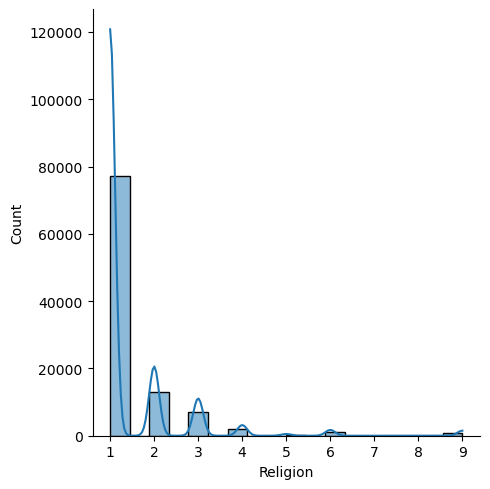

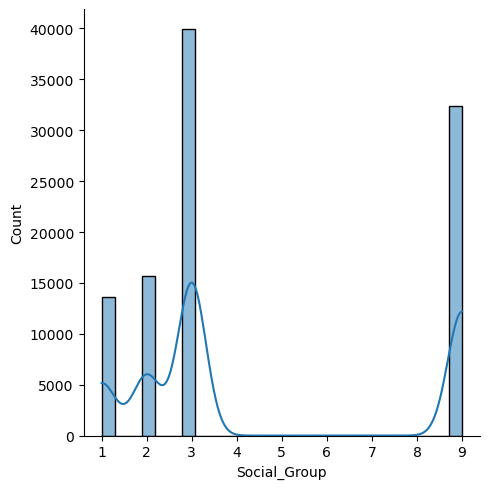

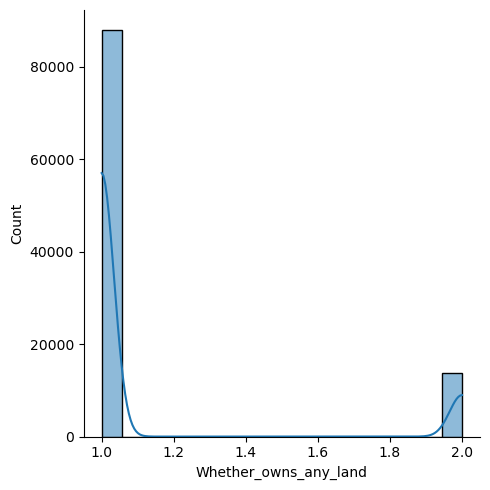

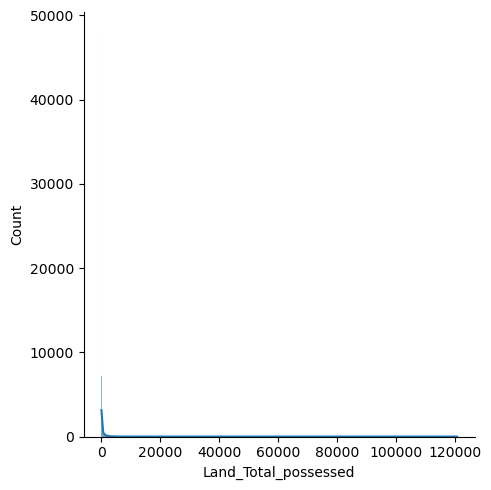

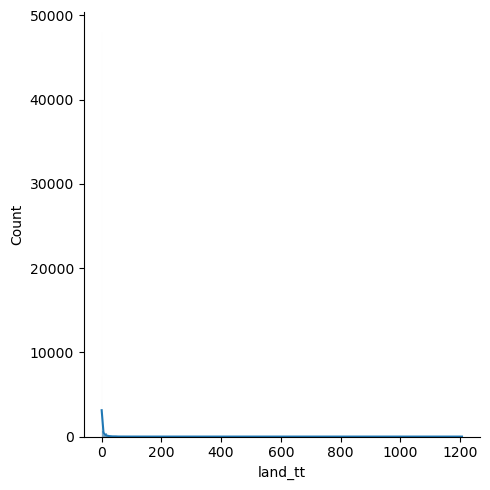

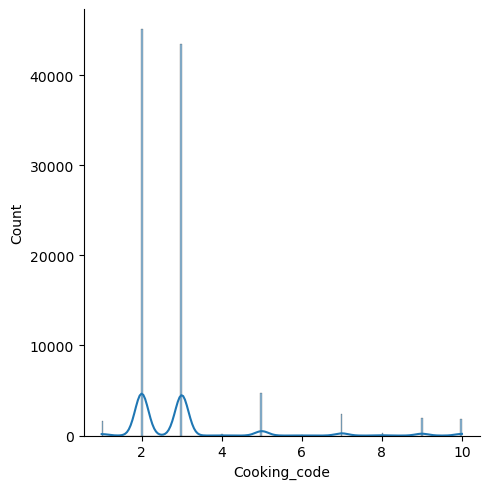

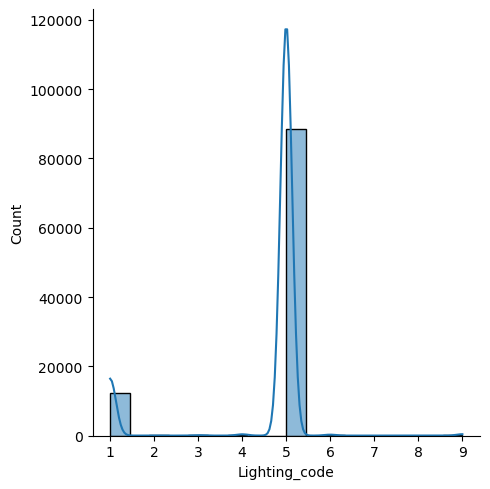

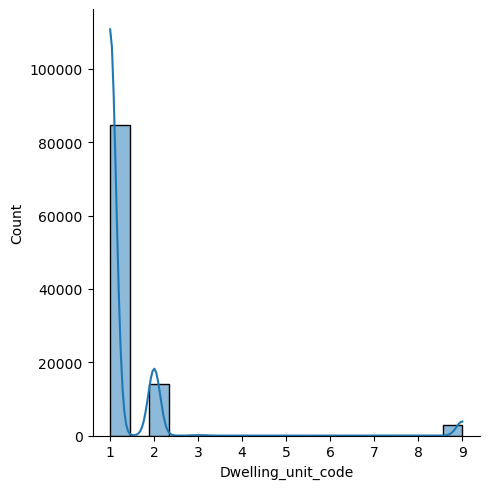

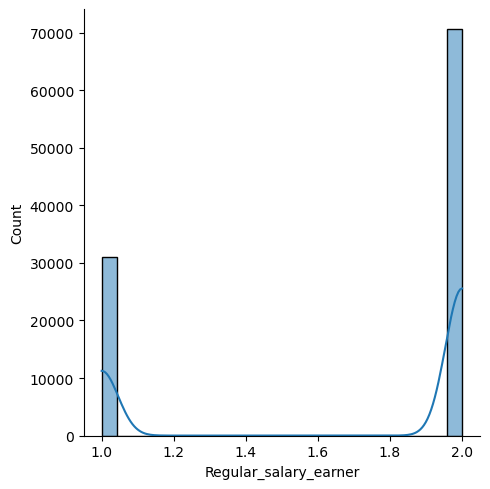

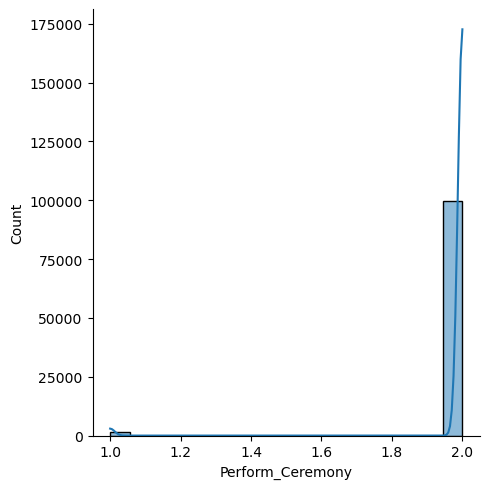

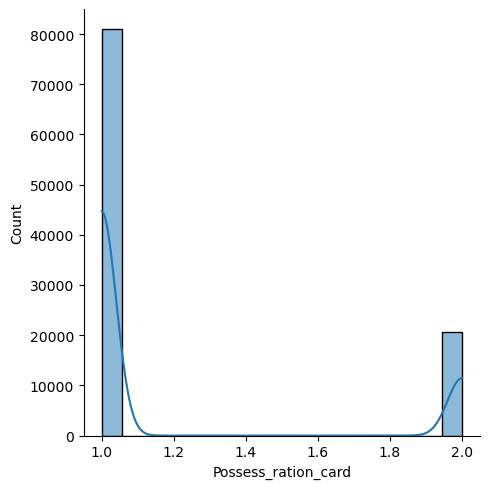

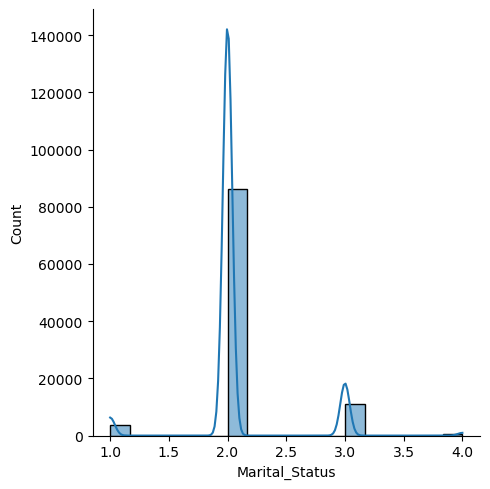

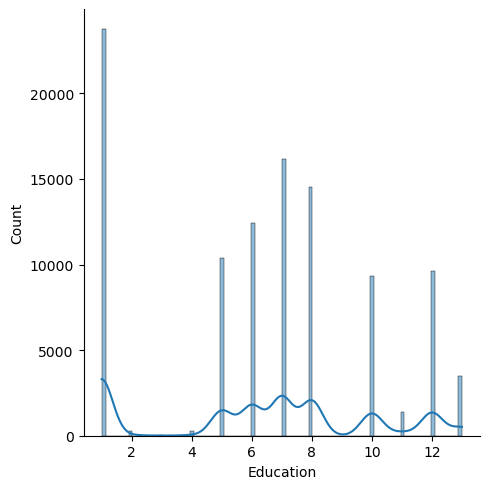

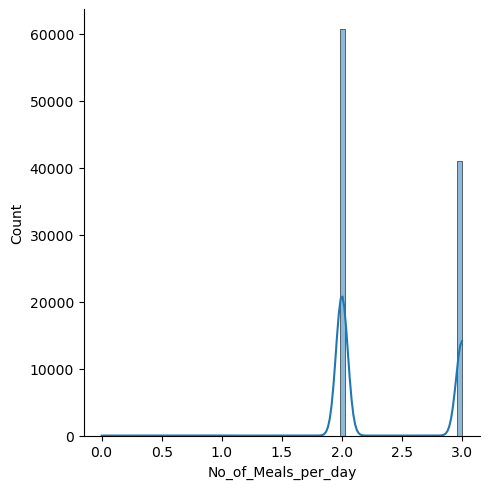

In [20]:
%matplotlib inline
#Analysing the distribution of the columns which have missing values
import seaborn as sns
for i in list_na2.index:
    sns.displot(df2[i],kde=True)
    

In [21]:
#by analysing the histograms it is found that most of the columns are discrete numeric,
#so missing values are replaced  by mode

for i in list_na2.index:
    df2[i].fillna( df2[i].mode()[0],inplace=True)

In [21]:
#missing values removed
df2.isna().sum().head(10)

Unnamed: 0         0
grp                0
Round_Centre       0
FSU_number         0
Round              0
Schedule_Number    0
Sample             0
Sector             0
state              0
State_Region       0
dtype: int64

### Data preparation: Encoding

In [22]:
dt=df2.dtypes

In [23]:
#separating categorical variables
cat=dt[dt=="object"].index

In [24]:
df2.loc[:,cat].head()

,grp,state_1
0,40999999999999992652495293775872.0,GUJ
1,40999999999999992652495293775872.0,GUJ
2,40999999999999992652495293775872.0,GUJ
3,40999999999999992652495293775872.0,GUJ
4,40999999999999992652495293775872.0,GUJ


In [25]:
#trying to convert "grp" to numeric gives a value error
df3=df2
#df3["grp"]=pd.to_numeric(df3["grp"])
#ValueError: Unable to parse string "454046801012351010104132    1101"

#so we try to convert the data with condition


In [26]:
# extracted only digits if the data contains spaces
import re
li_grp=[]
li_grp1=[]
for item in df3["grp"]:
    if isinstance(item, float)==True:
        li_grp.append(item)
        
    else:
        x=re.findall('\d+',item)[0]
        li_grp.append(x)

In [27]:
df3["grp"]=li_grp

In [28]:
#converted the column to float
df3["grp"]=df3["grp"].astype(float)

In [29]:
df3.dtypes.head(10)

Unnamed: 0           int64
grp                float64
Round_Centre         int64
FSU_number           int64
Round                int64
Schedule_Number      int64
Sample               int64
Sector               int64
state                int64
State_Region         int64
dtype: object

In [30]:
#encoded the state codes using label encoder
df3["state_1"]=LabelEncoder().fit_transform(df3["state_1"])

In [31]:
#dropping the extra column
df3.drop("Unnamed: 0",axis=1,inplace=True)

### Data preparation: Analysis of the target column

#### MPCE_URP is the target column which represents Mean per capita expenditure collected in the past 30 days

What is URP and MRP?
Uniform Reference Period (URP) vs Mixed Reference Period (MRP) Until 1993-94, 
consumption information collected by the NSSO was based on the Uniform Reference Period (URP), 
which measured consumption across a 30-day recall period. 
That is, survey respondents were asked about their consumption in the previous 30 days.

### Data preparation: Correlation analysis

In [32]:
#correlation matrix contains a lot of NAN values
#these columns contains constant values which are not useful for prediction
df3.corr().head()

,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,District,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
grp,1.000000,NaN,0.931227,NaN,NaN,NaN,-0.916489,-0.151652,-0.150837,0.072983,...,-0.070814,-0.093798,-0.007240,-0.066660,-0.150186,0.073839,-0.030350,0.033536,-0.152458,-0.195554
Round_Centre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FSU_number,0.931227,NaN,1.000000,NaN,NaN,NaN,-0.983359,-0.177290,-0.176650,0.054673,...,-0.078351,-0.101913,-0.004851,-0.064395,-0.149950,0.067969,-0.005378,0.016304,-0.174930,-0.199785
Round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Schedule_Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sample,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,-0.916489,NaN,-0.983359,NaN,NaN,NaN,1.000000,0.072006,0.071506,-0.044410,...,0.081664,0.105413,0.003485,0.066499,0.169540,-0.028308,0.015193,-0.024192,0.179982,0.199041
state,-0.151652,NaN,-0.177290,NaN,NaN,NaN,0.072006,1.000000,0.999909,-0.045759,...,0.046563,-0.015221,0.004932,-0.010802,-0.087064,-0.269094,-0.114448,0.164806,0.107079,0.048699
State_Region,-0.150837,NaN,-0.176650,NaN,NaN,NaN,0.071506,0.999909,1.000000,-0.042098,...,0.045880,-0.015645,0.004815,-0.011197,-0.088216,-0.268714,-0.112214,0.178116,0.106632,0.047313
District,0.072983,NaN,0.054673,NaN,NaN,NaN,-0.044410,-0.045759,-0.042098,1.000000,...,-0.054847,-0.021587,-0.007801,-0.020253,-0.118092,0.001541,0.214784,0.259461,0.005735,-0.053705


In [33]:
df["Round"].head(10)

0    68
1    68
2    68
3    68
4    68
5    68
6    68
7    68
8    68
9    68
Name: Round, dtype: int64

In [34]:
#calculating the correlation of target column with all other columns
def cal_cor(data,col):
    li_cor=[]
    label_cor=[]
    for i in data.columns:
        cor=np.corrcoef(col.values.flatten(),data[i].values.flatten())[0,1]
        li_cor.append(cor)
        label_cor.append(str(i))
    return pd.Series(li_cor,index=label_cor)

In [35]:
cal_cor(df3,df3["MPCE_URP"]).head(20)

grp                      -0.100101
Round_Centre                   NaN
FSU_number               -0.106674
Round                          NaN
Schedule_Number                NaN
Sample                         NaN
Sector                    0.111954
state                     0.037573
State_Region              0.037020
District                 -0.039785
Stratum_Number           -0.012734
Sub_Stratum               0.064764
Schedule_type                  NaN
Sub_Round                -0.007248
Sub_Sample                0.002278
FOD_Sub_Region            0.040887
Hamlet_Group_Sub_Block   -0.039460
Second                    0.008597
X_Stage_Stratum          -0.173324
HHS_No                    0.027933
dtype: float64

In [36]:
#filtering the columns which has NAN correlation
li_corr=cal_cor(df3,df3["MPCE_URP"])

In [37]:
li_corr_na=li_corr[li_corr.isna()==True].index

In [38]:
print("The features which have constant values and do not influence the target variable:")
li_corr_na

The features which have constant values and do not influence the target variable:


Index(['Round_Centre', 'Round', 'Schedule_Number', 'Sample', 'Schedule_type',
       'Filler', 'Person_Srl_No', 'Relation', 'icecream_q', 'otmilkp_q',
       'Milktotal_q', 'nonvegtotal_q', 'cocogno_q', 'guava_q', 'sighara_q',
       'orangeno_q', 'otfruits_q', 'fruitstt_q', 'dryfruitstotal_q', 'honey_q',
       'currypowder_q', 'teacupno_q', 'tealeaf_q', 'teatotal_q', 'cofeeno_q',
       'coffeepwdr_q', 'cofeetotal_q', 'ice_q', 'coldbvrg_q', 'juice_q',
       'othrbevrg_q', 'bevergest_q', 'Biscuits_q', 'preparedsweet_q',
       'Othrprocessed_q', 'nonvegtotal_v', 'cocogno_v', 'guava_v', 'sighara_v',
       'orangeno_v', 'fruitstt_v', 'dryfruitstotal_v', 'honey_v',
       'currypowder_v', 'teacupno_v', 'tealeaf_v', 'teatotal_v', 'cofeeno_v',
       'coffeepwdr_v', 'cofeetotal_v', 'ice_v', 'coldbvrg_v', 'juice_v',
       'othrbevrg_v', 'bevergest_v'],
      dtype='object')

In [39]:
#drop these columns
df4=df3.drop(li_corr_na,axis=1)

In [40]:
df4.shape

(101662, 308)

In [41]:
df4["MPCE_URP"].head(10)

0    3304.80
1    7613.00
2    3461.40
3    3339.00
4    2604.25
5    4391.00
6    2107.80
7     953.25
8    3447.00
9    4396.50
Name: MPCE_URP, dtype: float64

### creating independant and target variable

In [42]:
x=df4.drop("MPCE_URP",axis=1)

In [43]:
y=df4["MPCE_URP"]

### Checking the distribution of target variable

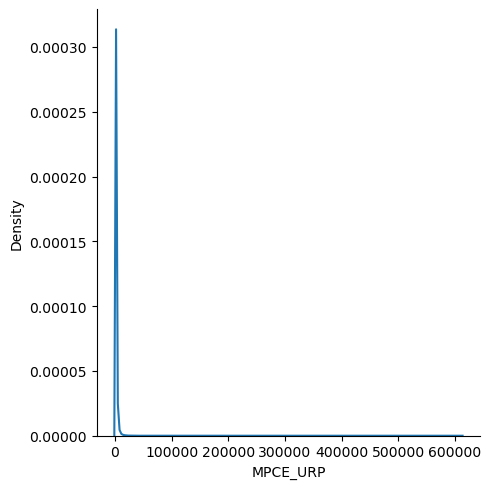

In [44]:
sns.displot(y,kind="kde")

In [45]:
y.skew()

68.88574129652557

In [46]:
y.kurtosis()

7339.968774777167

<AxesSubplot:xlabel='MPCE_URP'>

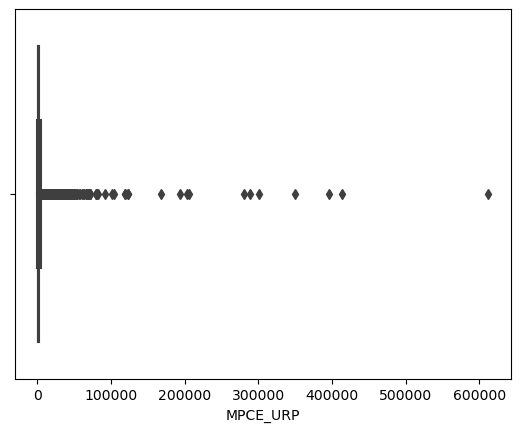

In [47]:
sns.boxplot(y)

##### the distribution plot shows that the target variable is highly skewed and leptokurtic(heavy outliers) The data needs transformation as Linear regression assumes multivariate normality

### Log transformation

In [48]:
from scipy.special import boxcox1p

x_trans=x.apply(lambda x: boxcox1p(x,0.0))


In [49]:
y_trans=y.apply(lambda x: boxcox1p(x,0.0))

### train_test_split

In [50]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import  SelectKBest,f_regression
x_tr,x_test,y_tr,y_test=train_test_split(x_trans,y_trans,test_size=.2,random_state=100)

### Multiple linear regression

In [51]:
lm_model1=LinearRegression().fit(x_tr,y_tr)

In [52]:
p=lm_model1.predict(x_test)

In [53]:
p1=lm_model1.predict(x_tr)

In [54]:
r2_tr_mod1=r2_score(y_tr,p1)

In [55]:
r2_test_mod1=r2_score(y_test,p)

In [56]:
print("Model1: multiple linear regression with log transformation")
print("Training accuracy score:",r2_tr_mod1)
print("Test accuracy score:",r2_test_mod1)

Model1: multiple linear regression with log transformation
Training accuracy score: 0.8848788564190108
Test accuracy score: 0.8854497099218193


### Feature selection using SelectKBest

In [57]:
l=len(x_tr.columns)

In [58]:
#finding the number of columns which gives best score
r2=[]
for k in range(1,l):
    kbest=SelectKBest(f_regression,k=k)
    x_new=kbest.fit_transform(x_trans,y_trans)
    x_tr,x_test,y_tr,y_test=train_test_split(x_new,y_trans,test_size=.2,random_state=100)
    lm=LinearRegression().fit(x_tr,y_tr)
    p=lm.predict(x_test)
    r2.append(r2_score(y_test,p))
    

In [59]:
max(r2)

0.8854770685318747

In [60]:
r2.index(max(r2))

295

In [61]:
best_k=296

In [62]:
x_new=SelectKBest(f_regression,k=best_k).fit_transform(x_trans,y_trans)

In [63]:
x_tr,x_test,y_tr,y_test=train_test_split(x_new,y_trans,test_size=.2,random_state=100)

In [64]:
lm_model2=LinearRegression().fit(x_tr,y_tr)

In [65]:
p_tr_kbest=lm_model2.predict(x_tr)

In [66]:
p_test_kbest=lm_model2.predict(x_test)

In [67]:
r2_kbest_tr=r2_score(y_tr,p_tr_kbest)

In [68]:
r2_kbest_test=r2_score(y_test,p_test_kbest)

In [69]:
print("Model2: multiple linear regression with selectKBest and log transformation")
print("Training accuracy score:",r2_kbest_tr)
print("Test accuracy score:",r2_kbest_test)

Model2: multiple linear regression with selectKBest and log transformation
Training accuracy score: 0.8848171272896113
Test accuracy score: 0.8854770685318747


### Linear regression with PCA

#### Scaling the data

In [70]:

x_scaled=StandardScaler().fit_transform(x_trans,y_trans)

In [71]:
pca_mod=PCA(.95)

In [72]:
x_pca=pca_mod.fit_transform(x_scaled)

In [73]:
x_pca.shape

(101662, 146)

In [74]:
var_ratio=np.cumsum(pca_mod.explained_variance_ratio_)

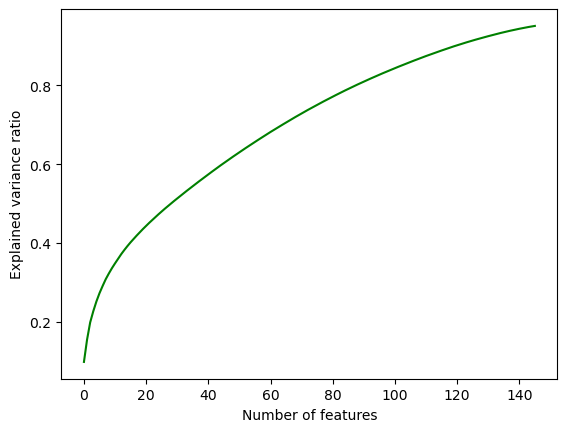

In [75]:
plt.xlabel("Number of features")
plt.ylabel("Explained variance ratio")
plt.plot(range(len(var_ratio)),var_ratio,color="green")
plt.show()

In [76]:
x_tr,x_test,y_tr,y_test=train_test_split(x_pca,y_trans,test_size=.2,random_state=100)

In [77]:
lm_model2_pca=LinearRegression().fit(x_tr,y_tr)

In [78]:
p_tr_pca=lm_model2_pca.predict(x_tr)

In [79]:
p_test_pca=lm_model2_pca.predict(x_test)

In [80]:
r2_tr_pca=r2_score(y_tr,p_tr_pca)

In [81]:
r2_test_pca=r2_score(y_test,p_test_pca)

In [82]:
print("Model3: multiple linear regression with PCA and log transformation")
print("Training accuracy score:",r2_tr_pca)
print("Test accuracy score:",r2_test_pca)

Model3: multiple linear regression with PCA and log transformation
Training accuracy score: 0.7948898252000492
Test accuracy score: 0.7943283046932011


### Linear regression tests

In [83]:
#residuals before transformation
residuals=y_tr-p_tr_pca

In [84]:
pd.Series(residuals).skew()

1.7526148088077165

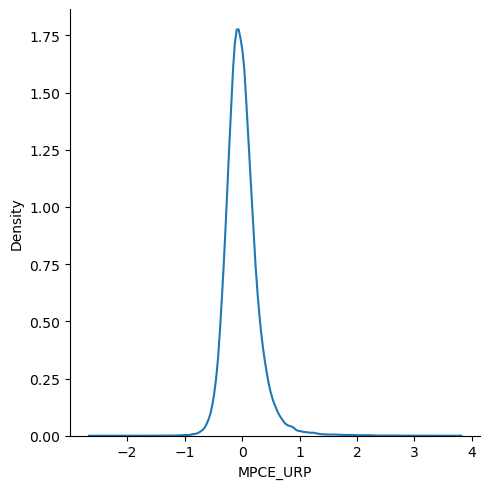

In [85]:
%matplotlib inline
sns.displot(residuals,kind="kde")
#residuals data is still right skewed ,has a high degree of outliers

### QQplot

((array([-4.30044642, -4.09966439, -3.99038426, ...,  3.99038426,
          4.09966439,  4.30044642]),
  array([-2.57470829, -2.4359838 , -2.33752943, ...,  3.58482861,
          3.65393899,  3.72531935])),
 (0.2759607987835455, 4.677893673721274e-16, 0.9485772708428469))

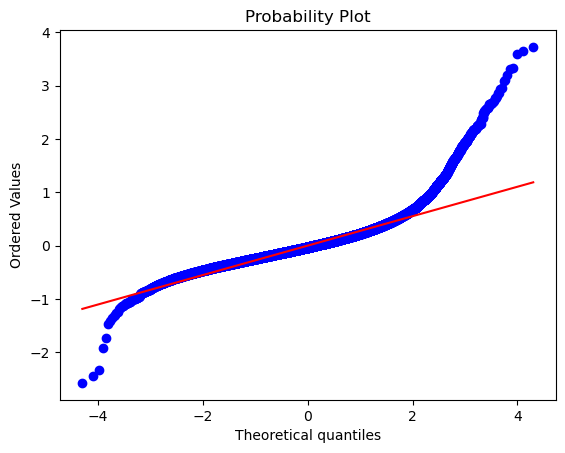

In [86]:
from scipy.stats import probplot
import pylab
probplot(residuals,dist="norm",plot=pylab)
#the plot shows a high degree of outliers

### shapiro wilk test

In [87]:

from scipy import stats
stats.shapiro(residuals)

ShapiroResult(statistic=0.8999307155609131, pvalue=0.0)

#### The pvalue is not less than .05 , which states that the residuals are normally distributed sample

### checking autocllinearity Durbin watson test

In [88]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)

2.0094785704487057

#### no autocorrelation as it is between 1.5 and 2.5

### Heteroskedascity test with breusch pegan test

In [89]:
#bptest for heterskedascity
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(residuals,x_tr)[1]


0.0

### null hypothesis is accepted means heterosckedascity not present

### Non linear regression with PCA

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,classification_report


In [91]:
x_tr,x_test,y_tr,y_test=train_test_split(x_pca,y_trans,test_size=.2,random_state=100)

In [92]:
dtree=DecisionTreeRegressor().fit(x_tr,y_tr)

In [93]:
p_tr_dtree=dtree.predict(x_tr)

In [94]:
p_test_dtree=dtree.predict(x_test)

In [95]:
r2_dtree_tr=r2_score(y_tr,p_tr_dtree)

In [96]:
r2_dtree_test=r2_score(y_test,p_test_dtree)

### Decision tree model is highly overfitted

##### Random forest

In [97]:
#non linear regression
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor().fit(x_tr,y_tr)


p_rf_tr=rf.predict(x_tr)

In [98]:
r2_rf_tr=r2_score(y_tr,p_rf_tr)

NameError: name 'p_rf_tr' is not defined

In [ ]:
p_rf_test=rf.predict(x_test)

In [ ]:
r2_rf_test=r2_score(y_test,p_rf_test)

In [ ]:
print("Model5: random forest non linear regression with log transformation")
print("Training accuracy score:",r2_rf_tr)
print("Test accuracy score:",r2_rf_test)

## Creating the model summary

In [ ]:
mod_tab=pd.DataFrame({"Model_name":["MLR log transformation","MLR SelectKBest","MLR PCA"," Decision regression tree","Random forest regression"],"Training_accuracy":[r2_tr_mod1,r2_kbest_tr,r2_tr_pca,r2_dtree_tr,r2_rf_tr],"Test_accuracy":[r2_test_mod1,r2_kbest_test,r2_test_pca,r2_dtree_test,r2_rf_test]})

In [ ]:
mod_tab

In [ ]:
#The MLR with PCA is chosen as the final model

In [ ]:
p=lm_model2_pca.predict(x_test)

In [ ]:
#inverse log transformation
p_original=np.exp(p)

In [ ]:
p_original